<table>
    <tr>
        <td>
            <img src="https://avatars.githubusercontent.com/u/123472619?v=4" alt="Descrição da Imagem" style="width:200px;"/>
        </td>
        <td>
            <p>
                <h6 style="font-size:20px;">Author: William Sousa</h6>
                <h6 style="font-size:20px;">Github: <a href="https://github.com/williamsousab">https://github.com/williamsousab</a></h6>
                <h6 style="font-size:20px;">Linkedin: <a href="https://www.linkedin.com/in/williamsousab">https://www.linkedin.com/in/williamsousab</a></h6>
            </p>
        </td>
    </tr>
</table>

### Previsões de ataque cardíaco em jovens vs adultos na Alemanha (StateWise)

### Dataset Predict Student Performance 

LINK: https://www.kaggle.com/datasets/ankushpanday1/heart-attack-in-youth-vs-adult-in-germany

![](https://storage.googleapis.com/kaggle-datasets-images/6447363/10404540/342ef1696c691fbc9632cb9424c68efd/dataset-cover.jpeg?t=2025-01-08-14-36-25)

## Sobre o conjunto de dados
#### Este conjunto de dados contém informações sobre ataques cardíacos em jovens (abaixo de 25 anos) e adultos (25+ anos) em vários estados da Alemanha de 2015 a 2023. Cada linha representa um indivíduo e inclui detalhes sobre sua saúde, estilo de vida e ambiente. Os dados são distribuídos de forma desigual para tornar a análise mais interessante.

In [18]:
import kagglehub
import pandas as pd
import os
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

# Download latest version
path = kagglehub.dataset_download("ankushpanday1/heart-attack-in-youth-vs-adult-in-germany")

print("Path to dataset files:", path)

# Find the CSV file in the download path
csv_file = None
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith(".csv"):
            csv_file = os.path.join(root, file)
            print("CSV file found:", csv_file)
            break

# Check if the CSV file was found
if csv_file:
    # Convert to DataFrame
    df = pd.read_csv(csv_file)
    print("CSV file found in the dataset directory.")
else:
    print("CSV file not found in the dataset directory.")

Path to dataset files: C:\Users\William Sousa\.cache\kagglehub\datasets\ankushpanday1\heart-attack-in-youth-vs-adult-in-germany\versions\1
CSV file found: C:\Users\William Sousa\.cache\kagglehub\datasets\ankushpanday1\heart-attack-in-youth-vs-adult-in-germany\versions\1\heart_attack_germany.csv
CSV file found in the dataset directory.


In [19]:
# Visualizar as primeiras linhas do DataFrame
df.head(20)

,State,Age_Group,Heart_Attack_Incidence,Year,Gender,BMI,Smoking_Status,Alcohol_Consumption,Physical_Activity_Level,Diet_Quality,...,Cholesterol_Level,Diabetes,Urban_Rural,Socioeconomic_Status,Air_Pollution_Index,Stress_Level,Healthcare_Access,Education_Level,Employment_Status,Region_Heart_Attack_Rate
0,Lower Saxony,Youth,0,2018,Other,25.6,Former Smoker,4.2,Moderate,Average,...,154.4,0,Rural,Low,31.58,Moderate,Moderate,Primary,Retired,1.92
1,Saxony,Adult,0,2021,Female,36.7,Smoker,2.4,Low,Poor,...,75.0,1,Rural,Low,46.22,High,Easy,Primary,Unemployed,14.16
2,Hesse,Youth,1,2022,Female,28.6,Smoker,29.5,High,Poor,...,121.9,0,Urban,Middle,15.69,High,Hard,Secondary,Student,3.49
3,Lower Saxony,Adult,0,2015,Male,27.6,Non-Smoker,4.2,Moderate,Poor,...,152.3,0,Urban,Low,26.50,High,Hard,Tertiary,Student,3.24
4,Hamburg,Adult,0,2015,Female,15.2,Smoker,4.3,Moderate,Good,...,130.3,0,Urban,High,11.21,High,Moderate,Tertiary,Employed,9.98
5,North Rhine-Westphalia,Adult,1,2023,Female,28.5,Former Smoker,3.4,Low,Poor,...,121.7,0,Urban,Middle,31.68,High,Moderate,Tertiary,Retired,1.91
6,Hesse,Youth,0,2017,Male,28.1,Non-Smoker,1.9,High,Good,...,98.0,0,Rural,High,39.82,Moderate,Hard,Tertiary,Unemployed,19.84
7,Hesse,Youth,0,2018,Female,26.1,Former Smoker,0.7,Moderate,Poor,...,65.6,0,Urban,Low,47.65,High,Hard,Tertiary,Retired,3.62
8,Lower Saxony,Adult,0,2015,Other,24.6,Non-Smoker,1.4,High,Average,...,118.5,0,Rural,Low,19.12,Low,Hard,Primary,Unemployed,18.55
9,Berlin,Youth,1,2020,Other,26.4,Former Smoker,0.5,Moderate,Average,...,118.7,1,Rural,Low,47.17,High,Moderate,Primary,Unemployed,7.80


In [20]:
# Resumo estatístico das colunas
df.describe()

,Heart_Attack_Incidence,Year,BMI,Alcohol_Consumption,Family_History,Hypertension,Cholesterol_Level,Diabetes,Air_Pollution_Index,Region_Heart_Attack_Rate
count,275644.000000,275644.000000,275644.000000,275644.000000,275644.000000,275644.000000,275644.000000,275644.000000,275644.000000,275644.000000
mean,0.150070,2018.997319,24.992669,4.985734,0.300540,0.400564,130.034229,0.199525,27.486225,10.489019
std,0.357141,2.582667,4.996535,5.001789,0.458494,0.490014,30.009242,0.399644,13.001527,5.483277
min,0.000000,2015.000000,1.400000,0.000000,0.000000,0.000000,-7.900000,0.000000,5.000000,1.000000
25%,0.000000,2017.000000,21.600000,1.400000,0.000000,0.000000,109.800000,0.000000,16.220000,5.750000
50%,0.000000,2019.000000,25.000000,3.500000,0.000000,0.000000,130.100000,0.000000,27.430000,10.490000
75%,0.000000,2021.000000,28.400000,6.900000,1.000000,1.000000,150.300000,0.000000,38.780000,15.240000
max,1.000000,2023.000000,47.900000,70.000000,1.000000,1.000000,272.400000,1.000000,50.000000,20.000000


In [21]:
# Verificar valores nulos
print(df.isnull().sum())

State                       0
Age_Group                   0
Heart_Attack_Incidence      0
Year                        0
Gender                      0
BMI                         0
Smoking_Status              0
Alcohol_Consumption         0
Physical_Activity_Level     0
Diet_Quality                0
Family_History              0
Hypertension                0
Cholesterol_Level           0
Diabetes                    0
Urban_Rural                 0
Socioeconomic_Status        0
Air_Pollution_Index         0
Stress_Level                0
Healthcare_Access           0
Education_Level             0
Employment_Status           0
Region_Heart_Attack_Rate    0
dtype: int64


In [22]:
# Se houver valores nulos, podemos substituí-los pela média ou mediana da coluna
# Exemplo de substituição pela média
#df.fillna(df.mean(), inplace=True)

In [23]:
df.dtypes

State                        object
Age_Group                    object
Heart_Attack_Incidence        int64
Year                          int64
Gender                       object
BMI                         float64
Smoking_Status               object
Alcohol_Consumption         float64
Physical_Activity_Level      object
Diet_Quality                 object
Family_History                int64
Hypertension                  int64
Cholesterol_Level           float64
Diabetes                      int64
Urban_Rural                  object
Socioeconomic_Status         object
Air_Pollution_Index         float64
Stress_Level                 object
Healthcare_Access            object
Education_Level              object
Employment_Status            object
Region_Heart_Attack_Rate    float64
dtype: object

## Análises Básicas (Iniciantes)

#### Comparações

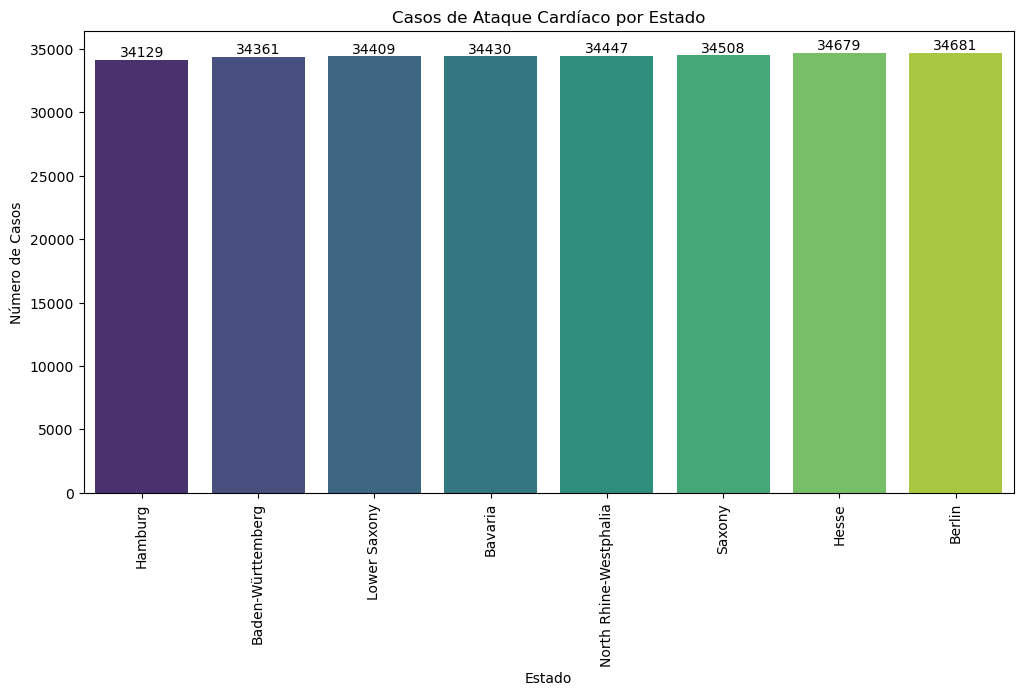

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar ataques cardíacos por estado e ordenar
estado_counts = df['State'].value_counts().sort_values()

# Gráfico de Barras com Rótulos
plt.figure(figsize=(12, 6))
sns.barplot(x=estado_counts.index, y=estado_counts.values, palette='viridis')
plt.title('Casos de Ataque Cardíaco por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Casos')
plt.xticks(rotation=90)

# Adicionar rótulos nas barras
for index, value in enumerate(estado_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

Hesse e Berlin tem os maiores números de casos

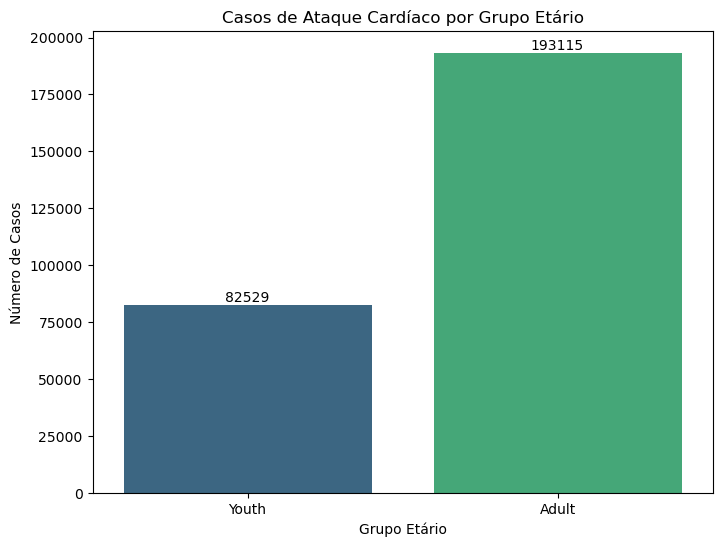

In [25]:
# Contar ataques cardíacos por grupo etário
grupo_etario_counts = df['Age_Group'].value_counts().sort_values()

# Gráfico de Barras com Rótulos
plt.figure(figsize=(8, 6))
sns.barplot(x=grupo_etario_counts.index, y=grupo_etario_counts.values, palette='viridis')
plt.title('Casos de Ataque Cardíaco por Grupo Etário')
plt.xlabel('Grupo Etário')
plt.ylabel('Número de Casos')

# Adicionar rótulos nas barras
for index, value in enumerate(grupo_etario_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

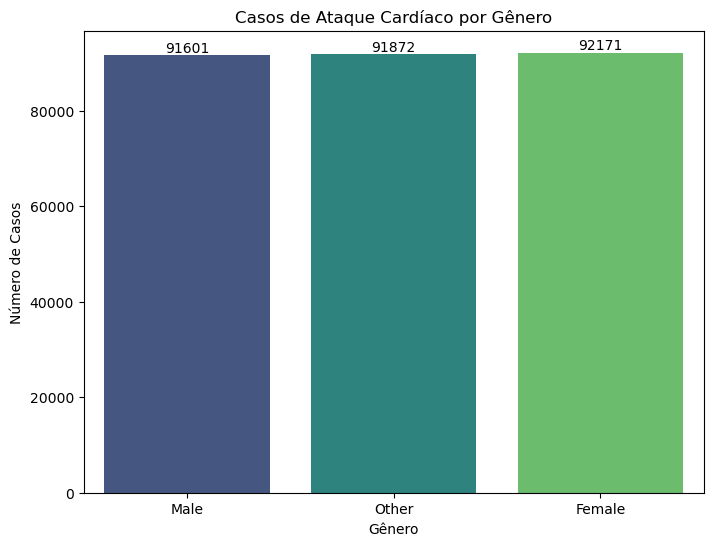

In [26]:
# Contar ataques cardíacos por gênero
genero_counts = df['Gender'].value_counts().sort_values()

# Gráfico de Barras com Rótulos
plt.figure(figsize=(8, 6))
sns.barplot(x=genero_counts.index, y=genero_counts.values, palette='viridis')
plt.title('Casos de Ataque Cardíaco por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Número de Casos')

# Adicionar rótulos nas barras
for index, value in enumerate(genero_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

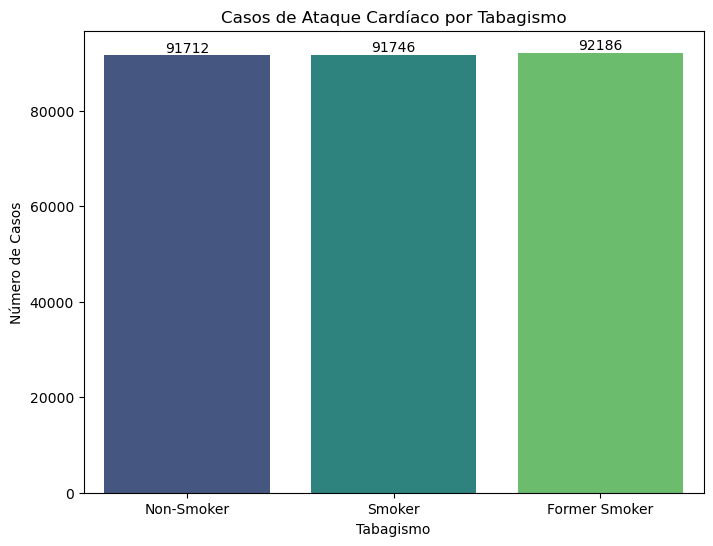

In [27]:
# Contar ataques cardíacos por tabagismo
tabagismo_counts = df['Smoking_Status'].value_counts().sort_values()

# Gráfico de Barras com Rótulos
plt.figure(figsize=(8, 6))
sns.barplot(x=tabagismo_counts.index, y=tabagismo_counts.values, palette='viridis')
plt.title('Casos de Ataque Cardíaco por Tabagismo')
plt.xlabel('Tabagismo')
plt.ylabel('Número de Casos')

# Adicionar rótulos nas barras
for index, value in enumerate(tabagismo_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

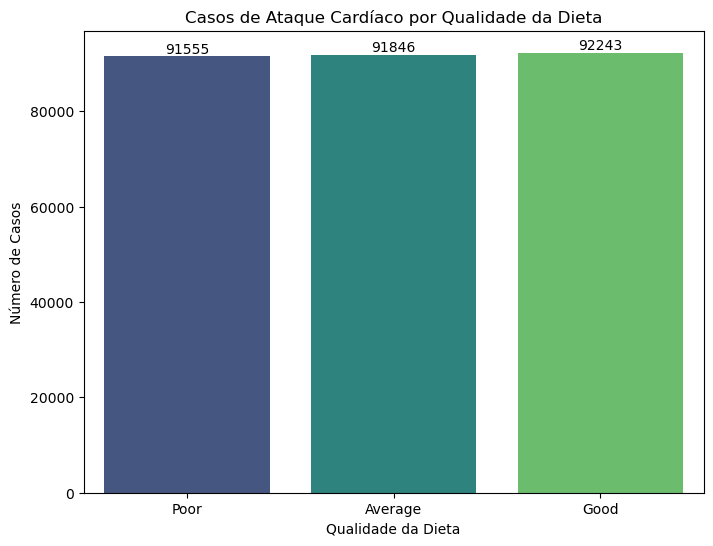

In [28]:
# Contar ataques cardíacos por qualidade da dieta
dieta_counts = df['Diet_Quality'].value_counts().sort_values()

# Gráfico de Barras com Rótulos
plt.figure(figsize=(8, 6))
sns.barplot(x=dieta_counts.index, y=dieta_counts.values, palette='viridis')
plt.title('Casos de Ataque Cardíaco por Qualidade da Dieta')
plt.xlabel('Qualidade da Dieta')
plt.ylabel('Número de Casos')

# Adicionar rótulos nas barras
for index, value in enumerate(dieta_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

### Podemos concluir que os Estados com maiores casos são Hesse (34.679) e Berlin (34.681) onde as mulheres adultas, ex-fumantes e com a qualidade boa de dieta são as que possuem os maiores casos de ataques cardíacos na Alemanha de 2015 a 2023.

### Análise de Fatores de Risco (Intermediário)
#### Vamos analisar como diferentes fatores de risco estão associados à incidência de ataques cardíacos. Fatores como IMC, hipertensão, colesterol, diabetes, entre outros.

C:\conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


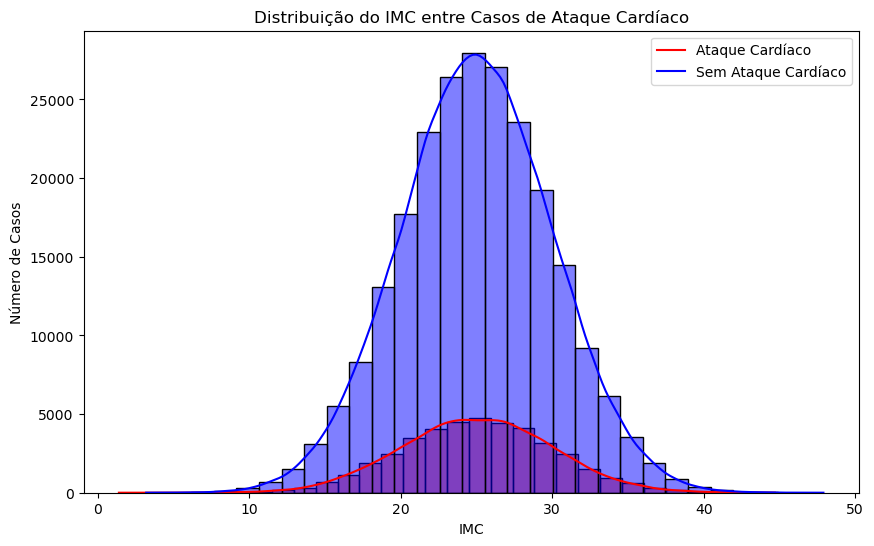

In [29]:
# Distribuição do IMC entre casos de ataque cardíaco
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Heart_Attack_Incidence'] == 1]['BMI'], bins=30, color='red', kde=True)
sns.histplot(df[df['Heart_Attack_Incidence'] == 0]['BMI'], bins=30, color='blue', kde=True)
plt.title('Distribuição do IMC entre Casos de Ataque Cardíaco')
plt.xlabel('IMC')
plt.ylabel('Número de Casos')
plt.legend(['Ataque Cardíaco', 'Sem Ataque Cardíaco'])
plt.show()


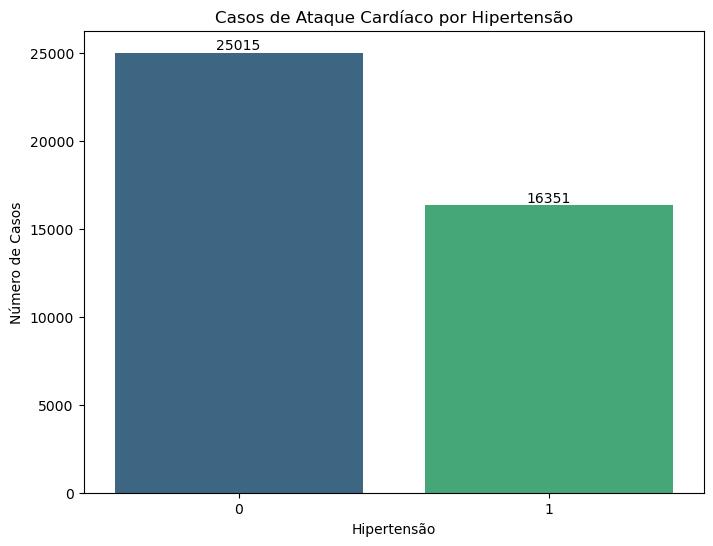

In [30]:
# Comparação de incidências de ataque cardíaco por hipertensão
hipertensao_counts = df.groupby('Hypertension')['Heart_Attack_Incidence'].sum()
plt.figure(figsize=(8, 6))
sns.barplot(x=hipertensao_counts.index, y=hipertensao_counts.values, palette='viridis')
plt.title('Casos de Ataque Cardíaco por Hipertensão')
plt.xlabel('Hipertensão')
plt.ylabel('Número de Casos')

# Adicionar rótulos nas barras
for index, value in enumerate(hipertensao_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()


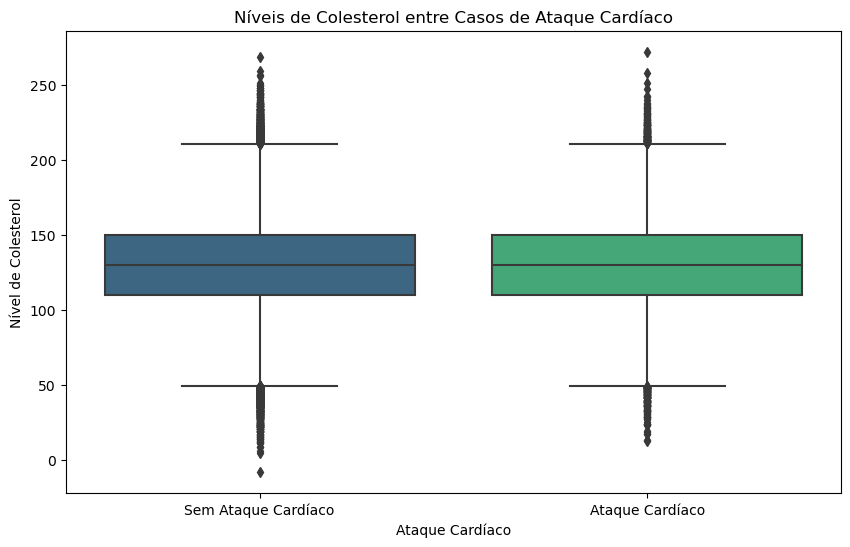

In [31]:
# Boxplot dos níveis de colesterol entre casos de ataque cardíaco
plt.figure(figsize=(10, 6))
sns.boxplot(x='Heart_Attack_Incidence', y='Cholesterol_Level', data=df, palette='viridis')
plt.title('Níveis de Colesterol entre Casos de Ataque Cardíaco')
plt.xlabel('Ataque Cardíaco')
plt.ylabel('Nível de Colesterol')
plt.xticks([0, 1], ['Sem Ataque Cardíaco', 'Ataque Cardíaco'])
plt.show()


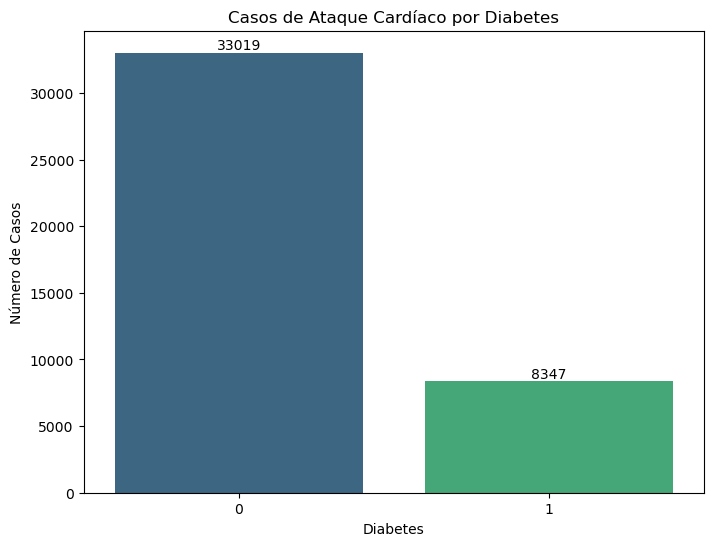

In [32]:
# Comparação de incidências de ataque cardíaco por diabetes
diabetes_counts = df.groupby('Diabetes')['Heart_Attack_Incidence'].sum()
plt.figure(figsize=(8, 6))
sns.barplot(x=diabetes_counts.index, y=diabetes_counts.values, palette='viridis')
plt.title('Casos de Ataque Cardíaco por Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Número de Casos')

# Adicionar rótulos nas barras
for index, value in enumerate(diabetes_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()


C:\conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


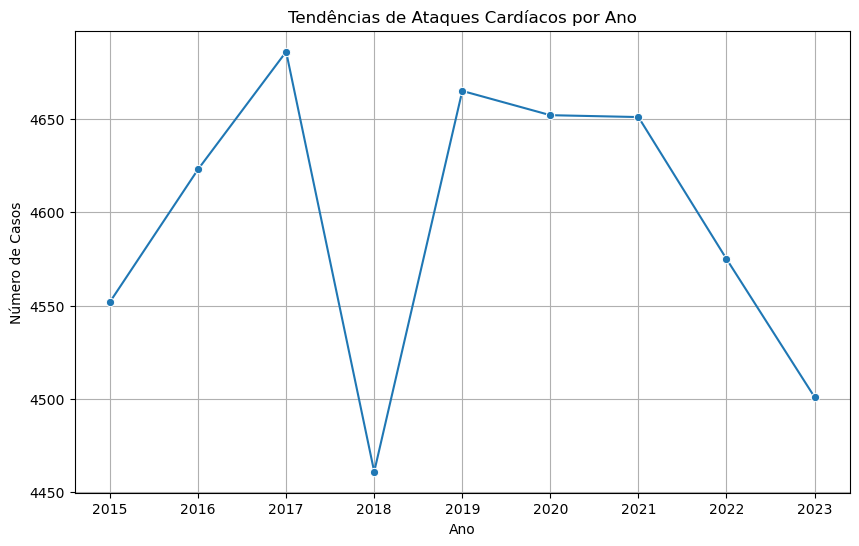

In [33]:
# Contar ataques cardíacos por ano
ano_counts = df.groupby('Year')['Heart_Attack_Incidence'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(x=ano_counts.index, y=ano_counts.values, marker='o')
plt.title('Tendências de Ataques Cardíacos por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Casos')
plt.grid(True)
plt.show()


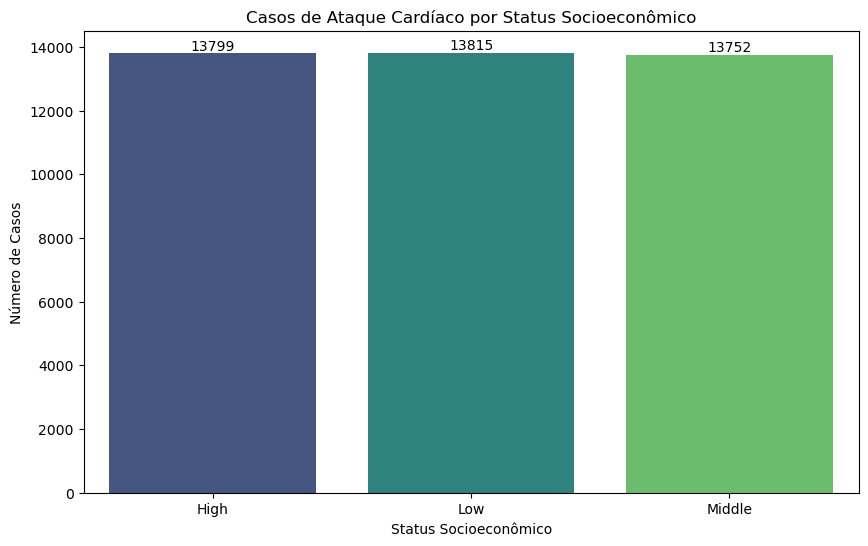

In [34]:
# Comparação de incidências de ataque cardíaco por status socioeconômico
socio_counts = df.groupby('Socioeconomic_Status')['Heart_Attack_Incidence'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=socio_counts.index, y=socio_counts.values, palette='viridis')
plt.title('Casos de Ataque Cardíaco por Status Socioeconômico')
plt.xlabel('Status Socioeconômico')
plt.ylabel('Número de Casos')

# Adicionar rótulos nas barras
for index, value in enumerate(socio_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()


### O IMC não é um fator fortemente discriminante para a incidência de ataques cardíacos.
### Pessoas sem Hipertensão possuem os maiores casos.
### O nível de Colesterol não é um fator fortemente discriminante para a incidência de ataques cardíacos.
### Pessoas sem Diabetes possuem os maiores casos.
### O ano com maior número de casos foi 2017, 2018 foi o que teve menor número de casos.
### Pessoas com menor Status Socioeconômico possuem os maiores casos.